In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
data = pd.read_csv('Marathon_1_mobile_price.csv')

In [5]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0,2.2,0,1,0.0,7,0.6,188.0,2,...,20.0,756,2549.0,9,7,19.0,0,0,1,1
1,1021.0,1,0.5,1,0,1.0,53,0.7,136.0,3,...,905.0,1988,2631.0,17,3,7.0,1,1,0,2
2,563.0,1,0.5,1,2,1.0,41,0.9,145.0,5,...,1263.0,1716,2603.0,11,2,9.0,1,1,0,2
3,615.0,1,2.5,0,0,0.0,10,0.8,131.0,6,...,1216.0,1786,2769.0,16,8,11.0,1,0,0,2
4,1821.0,1,1.2,0,13,1.0,44,0.6,141.0,2,...,1208.0,1212,1411.0,8,2,15.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1170.0,0,2.9,1,2,0.0,40,0.4,169.0,6,...,427.0,684,2366.0,16,8,2.0,1,1,1,1
611,1595.0,1,0.8,1,0,1.0,44,0.7,85.0,4,...,1024.0,1838,3881.0,14,10,9.0,1,0,1,3
612,1719.0,1,2.0,0,0,0.0,12,0.3,122.0,8,...,240.0,904,462.0,6,3,5.0,0,0,0,0
613,1770.0,0,2.3,1,0,0.0,7,0.8,128.0,7,...,886.0,1552,1480.0,6,1,17.0,1,0,0,1


## Q1. Find missing values in the dataset

In [6]:
data.isnull().sum()

battery_power    4
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           1
int_memory       0
m_dep            0
mobile_wt        1
n_cores          0
pc               0
px_height        1
px_width         0
ram              1
sc_h             0
sc_w             0
talk_time        1
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Q2. Remove missing values 

In [7]:
data.fillna(0 , inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  615 non-null    float64
 1   blue           615 non-null    int64  
 2   clock_speed    615 non-null    float64
 3   dual_sim       615 non-null    int64  
 4   fc             615 non-null    int64  
 5   four_g         615 non-null    float64
 6   int_memory     615 non-null    int64  
 7   m_dep          615 non-null    float64
 8   mobile_wt      615 non-null    float64
 9   n_cores        615 non-null    int64  
 10  pc             615 non-null    int64  
 11  px_height      615 non-null    float64
 12  px_width       615 non-null    int64  
 13  ram            615 non-null    float64
 14  sc_h           615 non-null    int64  
 15  sc_w           615 non-null    int64  
 16  talk_time      615 non-null    float64
 17  three_g        615 non-null    int64  
 18  touch_scre

## Q3. Find duplicate values

In [22]:
data[data.duplicated()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
data[data.drop_duplicates(inplace=True)]


In [26]:
data.drop_duplicates(inplace=True)


## Q4. Get a 50% random sample of the data

In [27]:
data.sample(frac = .5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
67,1358.0,1,0.5,0,11,1.0,36,0.3,155.0,4,...,1565.0,1858,3068.0,9,4,4.0,1,1,0,3
564,1290.0,0,0.5,0,0,0.0,3,0.1,143.0,6,...,600.0,1109,1214.0,9,8,15.0,0,1,1,1
166,517.0,0,1.4,1,3,1.0,33,0.8,183.0,4,...,660.0,974,3704.0,17,16,11.0,1,0,1,3
253,708.0,1,2.7,1,0,1.0,63,1.0,195.0,8,...,78.0,654,2169.0,6,5,7.0,1,1,1,1
390,1712.0,0,1.4,0,1,0.0,63,0.5,137.0,7,...,747.0,1126,3652.0,16,1,19.0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,867.0,0,1.4,1,0,1.0,4,0.7,135.0,6,...,70.0,1974,790.0,13,6,3.0,1,1,0,0
120,1778.0,0,0.5,0,0,0.0,15,0.5,102.0,3,...,1445.0,1954,1214.0,5,0,14.0,1,0,0,1
591,612.0,1,0.7,0,6,0.0,35,0.6,181.0,5,...,1294.0,1337,3169.0,14,9,6.0,0,0,0,2
580,1853.0,1,1.0,0,2,0.0,23,0.4,92.0,1,...,202.0,1951,2775.0,14,4,17.0,1,0,0,3


## Q5.  What is the difference between correlation and covariance

correlation : it shows the relation between two varibles (-1 to 1) shows strength
covariance : shows diff between two variables (shows direction of data)

# ----------------------------------------------------------------------------------------------------------

In [49]:
df = pd.read_csv('Marathon_1_date_fruits.xlsx - Date_Fruit_Datasets.csv')

In [50]:
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,0.9374,0.8750,0.0020,0.0015,0.7657,0.9936,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,0.9773,0.9065,0.0021,0.0018,0.8218,0.9993,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,0.9446,0.8706,0.0018,0.0014,0.7580,0.9968,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,0.9458,0.8791,0.0020,0.0016,0.7727,0.9915,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,0.9358,0.8707,0.0022,0.0017,0.7582,0.9938,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,0.8658,0.8243,0.0027,0.0019,0.6794,0.9850,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,0.6475,0.7979,0.0023,0.0015,0.6366,0.9875,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,0.8609,0.7613,0.0029,0.0017,0.5796,0.9945,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,0.8263,0.7697,0.0030,0.0018,0.5924,0.9609,SOGAY


In [32]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,0.857720,0.807190,0.003428,0.001794,0.655420,0.988680
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,0.070839,0.062175,0.020456,0.000428,0.094314,0.020473
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,0.004800,0.041100,0.001700,0.001100,0.001700,0.756800
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,0.827750,0.768050,0.002200,0.001500,0.589975,0.989300
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,0.867750,0.804950,0.002600,0.001600,0.647950,0.993600
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,0.899500,0.848875,0.003200,0.002075,0.720625,0.996400
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,0.977300,0.968100,0.615400,0.004300,0.937300,0.999500


In [33]:
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

In [36]:
df[df.duplicated()]

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class


In [39]:
df.corr()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
AREA,1.000000,0.956494,0.878893,0.954899,-0.370303,0.993243,0.027371,0.998886,-0.086286,-0.095342,0.044346,0.315197,-0.124025,-0.861870,0.332349,0.039321
PERIMETER,0.956494,1.000000,0.960734,0.859990,-0.166816,0.959938,-0.133857,0.963489,-0.214632,0.018308,-0.235744,0.078554,-0.011718,-0.934379,0.103959,-0.036744
MAJOR_AXIS,0.878893,0.960734,1.000000,0.721133,0.063090,0.886277,-0.166982,0.886948,-0.279951,0.111631,-0.355258,-0.164403,0.081976,-0.959569,-0.136056,-0.048096
MINOR_AXIS,0.954899,0.859990,0.721133,1.000000,-0.607120,0.948006,0.059613,0.951470,0.028003,-0.150407,0.243655,0.551966,-0.176214,-0.736051,0.572201,-0.004244
ECCENTRICITY,-0.370303,-0.166816,0.063090,-0.607120,1.000000,-0.335085,-0.220434,-0.356565,-0.342775,0.110238,-0.659626,-0.917470,0.114084,-0.026945,-0.967224,-0.020083
EQDIASQ,0.993243,0.959938,0.886277,0.948006,-0.335085,1.000000,0.018777,0.993397,-0.112353,-0.157370,0.035564,0.301535,-0.186715,-0.887398,0.304564,0.037291
SOLIDITY,0.027371,-0.133857,-0.166982,0.059613,-0.220434,0.018777,1.000000,-0.016449,0.392552,-0.189234,0.611010,0.384826,-0.188307,0.047237,0.367759,0.874596
CONVEX_AREA,0.998886,0.963489,0.886948,0.951470,-0.356565,0.993397,-0.016449,1.000000,-0.107403,-0.095457,0.015083,0.297794,-0.124221,-0.865527,0.313861,0.005152
EXTENT,-0.086286,-0.214632,-0.279951,0.028003,-0.342775,-0.112353,0.392552,-0.107403,1.000000,0.067207,0.470357,0.365187,0.072829,0.216175,0.394855,0.229890
ASPECT_RATIO,-0.095342,0.018308,0.111631,-0.150407,0.110238,-0.157370,-0.189234,-0.095457,0.067207,1.000000,-0.410407,-0.422474,0.999515,-0.055882,-0.243065,-0.134463


<AxesSubplot:>

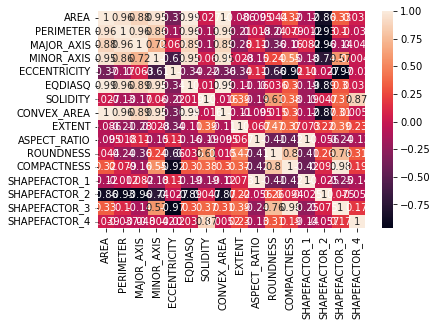

In [37]:
sns.heatmap(df.corr(), annot = True )

## Q7. Label encode the Class Column

In [41]:
le = LabelEncoder()

In [43]:
df['Class'] = le.fit_transform(df['Class'])

In [45]:
df['Class'].unique()

array([0, 1, 2, 3, 4, 5, 6])

## Q8. One hot encode the Class Column

In [65]:
oc = OneHotEncoder(sparse = False)

In [66]:
t= oc.fit_transform(df[['Class']])

In [67]:
a = pd.DataFrame(t)

In [68]:
a

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
893,0.0,0.0,0.0,0.0,0.0,0.0,1.0
894,0.0,0.0,0.0,0.0,0.0,0.0,1.0
895,0.0,0.0,0.0,0.0,0.0,0.0,1.0
896,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Q 9. Calculate 5 number summary for numerical columns

In [58]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,0.857720,0.807190,0.003428,0.001794,0.655420,0.988680
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,0.070839,0.062175,0.020456,0.000428,0.094314,0.020473
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,0.004800,0.041100,0.001700,0.001100,0.001700,0.756800
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,0.827750,0.768050,0.002200,0.001500,0.589975,0.989300
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,0.867750,0.804950,0.002600,0.001600,0.647950,0.993600
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,0.899500,0.848875,0.003200,0.002075,0.720625,0.996400
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,0.977300,0.968100,0.615400,0.004300,0.937300,0.999500


## Q 10. Plot historgram for "Class"

(array([ 65.,  98.,   0., 204.,   0.,  72., 166.,   0., 199.,  94.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

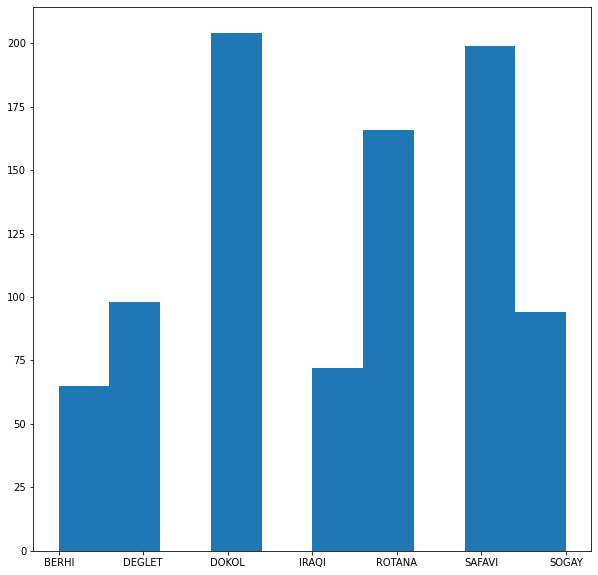

In [73]:
plt.figure(figsize = (10,10))
plt.hist(x = df['Class'])

## Q 11. Plot box plot for "Area"

<AxesSubplot:ylabel='AREA'>

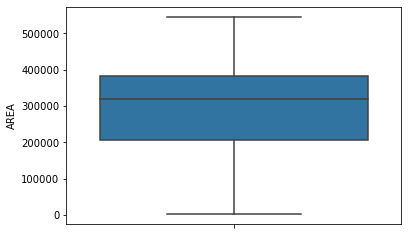

In [76]:
sns.boxplot(y = df['AREA'], data = df)

## Q 12. Plot scatterplot of "AREA" vs "MAJOR_AXIS"

<AxesSubplot:xlabel='AREA', ylabel='MAJOR_AXIS'>

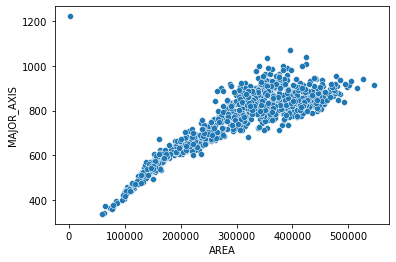

In [77]:
sns.scatterplot(x = df['AREA'], y = df['MAJOR_AXIS'])

## Q 13. Plot pairplot of 'MAJOR_AXIS' and"MINOR_AXIS

In [82]:
daf = df[['MAJOR_AXIS','MINOR_AXIS']]

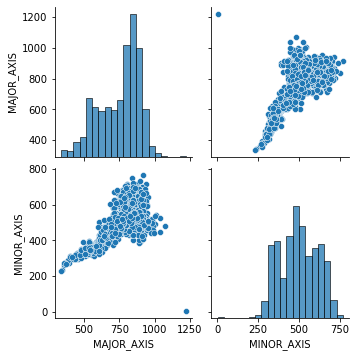

In [83]:
sns.pairplot(data = daf)

## Q 14. Plot Heatmap of correlation

<AxesSubplot:>

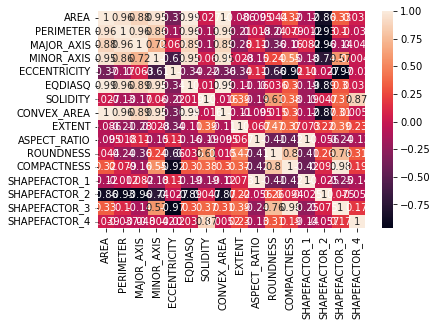

In [84]:
sns.heatmap(df.corr(),annot = True)

## Q 15. Craete a linear Regression Model which can predict CONVEX_AREA using the SHAPEFACTOR_1,	SHAPEFACTOR_2,	SHAPEFACTOR_3 and SHAPEFACTOR_4 columns. 

In [126]:
x = df[['SHAPEFACTOR_1','SHAPEFACTOR_2','SHAPEFACTOR_3','SHAPEFACTOR_4']]
y = df['CONVEX_AREA']

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [197]:
y_train.shape

(718,)

In [198]:
y_test

890    354954
844    275780
465    286307
129    255626
33     425214
        ...  
248    132350
668    360665
244    222332
219    148026
191    155138
Name: CONVEX_AREA, Length: 180, dtype: int64

In [199]:
y_pred

array([ 409667.24710793,  409945.21034415,  165954.29754089,
        167971.01387792,  243992.87709357,  332210.72427385,
        430369.09070592,  118004.69663211,  192543.6434993 ,
        415297.4405496 ,  142344.30785206,  376868.15053984,
        349971.0133113 ,  187308.7133771 ,  389082.61265816,
        394692.49226073,  361992.89227241,  361800.34374432,
        176130.95230937,  300720.18108693,  388177.0586503 ,
        409173.06193207,  258663.39031249,  240189.24073466,
        207508.74455156,  321013.65223997,  427205.20667637,
        245704.65264087,  224995.03027306,  409681.50467941,
        368688.65497519,  277188.88147109,  420365.06831565,
         83050.95236693,  -12330.98345772,  199180.03732553,
        204895.88141208,  125334.16989152,  316966.35968363,
        360996.31623979,  294103.5240175 ,  231075.66376356,
        314920.90024131,  355618.61223364,  204889.15677695,
        353255.6772659 ,  156668.20070762,  412863.74018532,
        416314.07797157,

In [200]:
ss = StandardScaler()

In [201]:
x_train = ss.fit_transform(x_train)

In [202]:
x_test = ss.transform(x_test)

In [203]:
reg = LinearRegression()

In [204]:
reg.fit(x_train,y_train)

LinearRegression()

In [205]:
y_pred = reg.predict(x_test)

In [206]:
reg.coef_

array([ -8193.7181513 , -98491.21855125,  42831.41090977, -14327.59333591])

In [207]:
reg.intercept_

302595.5682451253

In [208]:
print('Mean absolute error :', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 score :', metrics.r2_score(y_test,y_pred))

Mean absolute error : 24900.42665101917
Mean Squared error : 873967303.0315657
Root mean squared error : 29562.937997289202
R2 score : 0.923856693558734
